### Table of Contents:
* [1. Feature selection and improve accuracy of data mining results ](#1)
* &emsp;[1.1. Importing Libraries](#11)
* &emsp;[1.2. Converting categorical data to numerical](#12)
* &emsp;[1.3. Correlation Matrix](#13)
* &emsp;[1.4. Heat-Map of correlation Matrix](#14)
* &emsp;[1.5. Relevant attributes to improve the accuracy of data mining results](#15)

# 1. Feature selection and improve accuracy of data mining results <a class="anchor" id="1"></a>

Select relevant attributes from your dataset to improve the accuracy of data mining results. 

## 1.1. Importing Libraries <a class="anchor" id="11"></a>

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Converting categorical data to numerical <a class="anchor" id="12"></a>

In [2]:
df = pd.read_csv('data/training_data.csv')

In [3]:
categorical_features = ['company','country','director','genre','rating','released','star','year',
                        'writer','original_title','overview','title','genres_edited',
                        'spoken_languages_edited','keywords_edited']
continuous_features = ['budget','runtime','score','votes']
normalized_features = [e+'_norm' for e in continuous_features]
target_features = ['isprofit','profitability_ratio']
all_features = categorical_features + continuous_features + normalized_features + target_features

In [4]:
df['company']=df['company'].astype('category').cat.codes
df['country']=df['country'].astype('category').cat.codes
df['director']=df['director'].astype('category').cat.codes
df['genre']=df['genre'].astype('category').cat.codes
df['rating']=df['rating'].astype('category').cat.codes
df['star']=df['star'].astype('category').cat.codes
df['writer']=df['writer'].astype('category').cat.codes

## 1.3. Correlation Matrix <a class="anchor" id="13"></a>

In [5]:
corr_df=df[all_features].corr()

In [6]:
corr_df

,company,country,director,genre,rating,star,year,writer,budget,runtime,score,votes,budget_norm,runtime_norm,score_norm,votes_norm,isprofit,profitability_ratio
company,1.000000,-0.016675,-0.007958,-0.068820,-0.099241,0.027254,-0.021056,0.022839,0.074338,-0.005302,-0.018536,0.001071,0.074338,-0.005302,-0.018536,0.001071,0.017490,0.022623
country,-0.016675,1.000000,0.032930,-0.008206,0.020008,-0.037735,-0.060132,-0.018664,0.062170,-0.074120,-0.085709,0.016110,0.062170,-0.074120,-0.085709,0.016110,0.122048,0.151513
director,-0.007958,0.032930,1.000000,0.062830,0.010008,0.073803,-0.040501,0.142315,-0.023738,0.044438,0.089611,0.026287,-0.023738,0.044438,0.089611,0.026287,-0.034057,0.008240
genre,-0.068820,-0.008206,0.062830,1.000000,0.148095,0.024644,0.007107,0.012354,-0.297798,0.049206,0.120176,-0.122178,-0.297798,0.049206,0.120176,-0.122178,0.032127,0.050628
rating,-0.099241,0.020008,0.010008,0.148095,1.000000,0.020667,-0.036808,-0.004206,-0.186166,0.196264,0.097757,0.044550,-0.186166,0.196264,0.097757,0.044550,-0.091687,-0.109055
star,0.027254,-0.037735,0.073803,0.024644,0.020667,1.000000,-0.020217,0.023001,0.019753,0.047789,0.038582,0.017700,0.019753,0.047789,0.038582,0.017700,-0.013436,-0.013157
year,-0.021056,-0.060132,-0.040501,0.007107,-0.036808,-0.020217,1.000000,-0.020880,0.234908,-0.024934,0.007414,0.316615,0.234908,-0.024934,0.007414,0.316615,-0.071260,-0.134113
writer,0.022839,-0.018664,0.142315,0.012354,-0.004206,0.023001,-0.020880,1.000000,-0.037847,-0.006986,0.030348,-0.007611,-0.037847,-0.006986,0.030348,-0.007611,-0.019787,0.001966
budget,0.074338,0.062170,-0.023738,-0.297798,-0.186166,0.019753,0.234908,-0.037847,1.000000,0.236606,-0.110972,0.412289,1.000000,0.236606,-0.110972,0.412289,-0.069334,-0.118184
runtime,-0.005302,-0.074120,0.044438,0.049206,0.196264,0.047789,-0.024934,-0.006986,0.236606,1.000000,0.379327,0.192825,0.236606,1.000000,0.379327,0.192825,-0.035950,-0.044726


## 1.4. Heat-Map of correlation Matrix <a class="anchor" id="14"></a>

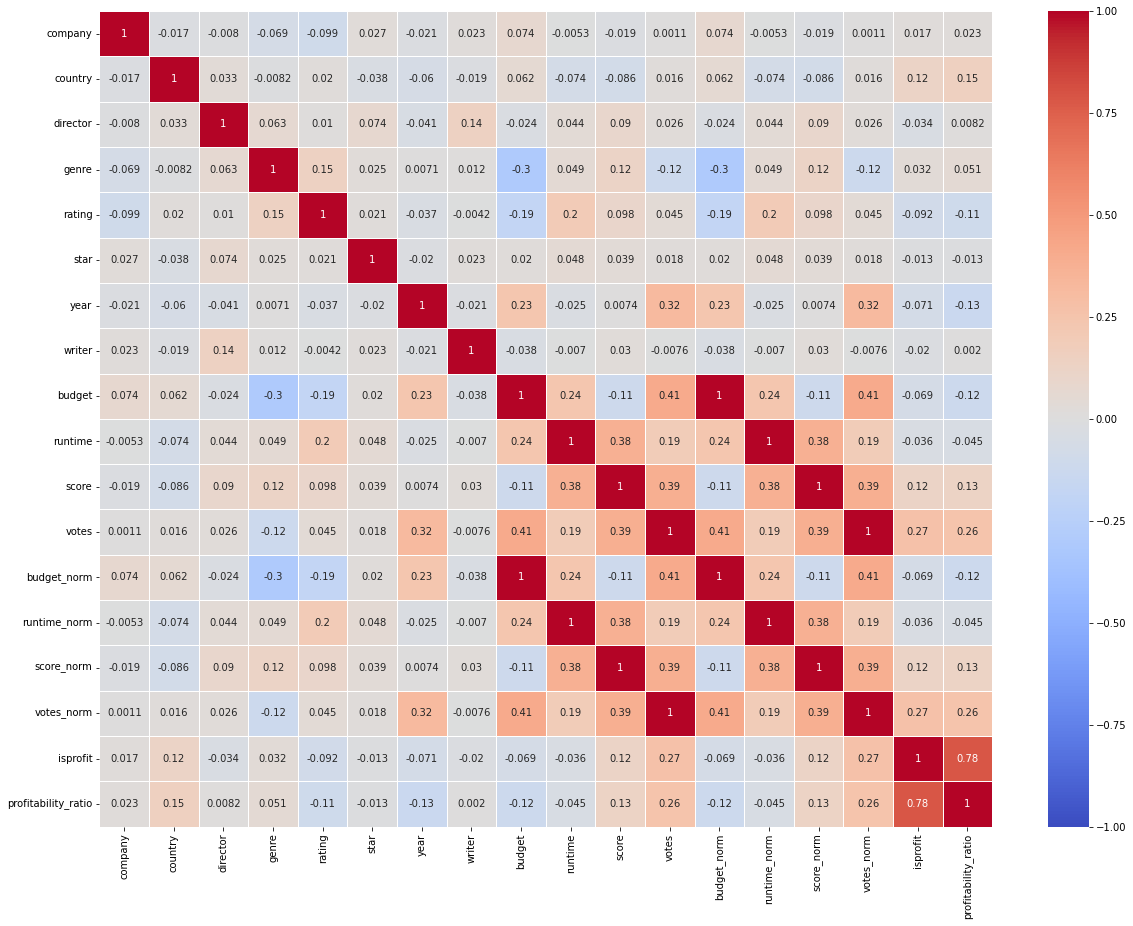

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_df,cmap='coolwarm',vmin=-1, vmax=1,annot=True,linewidth=.5);


## 1.5. Relevant attributes to improve the accuracy of data mining results <a class="anchor" id="15"></a>

In [10]:
corr_df_features = set()
for i in range(len(corr_df.columns)-2):
    if corr_df.iloc[i,16]<-0.04 or corr_df.iloc[i,16]>0.04 or \
        corr_df.iloc[i,17]<-0.04 or corr_df.iloc[i,17]>0.04:
        corr_df_features.add(corr_df.columns[i])

In [11]:
corr_df_features

{'budget',
 'budget_norm',
 'country',
 'genre',
 'rating',
 'runtime',
 'runtime_norm',
 'score',
 'score_norm',
 'votes',
 'votes_norm',
 'year'}

In [12]:
df[list(corr_df_features)+['isprofit','profitability_ratio']].to_csv('data/final_training_data.csv')